# **_INSTALL DEPENDENCIES_**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

FILES = "Files"
EX1DATA1 = FILES + "/ex1data1.txt"
EX1DATA2 = FILES + "/ex1data2.txt"

# with open('../README.md', 'r', encoding='utf-8') as f:
#     display(Markdown(f.read()))

# Step 1: Identity Matrix

In [17]:
def warm_up_exercise():
    """
    Returns a 5x5 identity matrix
    """
    A = np.eye(5)
    return A

print("Running warmUpExercise ...")
A = warm_up_exercise()
print("5x5 Identity Matrix:\n", A)

Running warmUpExercise ...
5x5 Identity Matrix:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# Step 2: Helper Functions

## Step 2.1: Plotting Data

In [18]:
def plot_data(x, y):
    """
    Plots the data points x and y
    """
    plt.scatter(x, y, color='red', marker='x', label='Training data')
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")
    plt.legend()
    plt.show()

## Step 2.2: Compute Cost Function (Single Variable)

In [19]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression
    J = (1/(2*m)) * sum((X*theta - y)^2)
    """
    m = y.size
    predictions = X.dot(theta)
    errors = predictions - y
    J = (1 / (2 * m)) * np.sum(errors**2)
    return J

## Step 2.3: Gradient Descent (Single Variable)

In [20]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta
    """
    m = y.size
    J_history = []

    for _ in range(num_iters):
        theta = theta - (alpha / m) * (X.T.dot(X.dot(theta) - y))
        J_history.append(compute_cost(X, y, theta))
    
    return theta, J_history

# Step 3: Load and Visualize Data (Single Variable)

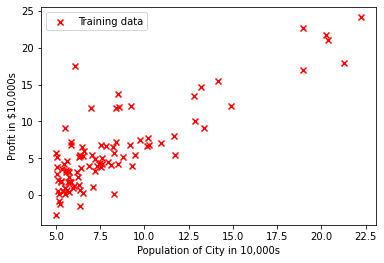

In [22]:
data = np.loadtxt(EX1DATA1)
X = data[:, 0]
y = data[:, 1]
m = y.size

plot_data(X, y)

# Step 4: Prepare Data and Test Cost Function

In [23]:
X_b = np.c_[np.ones(m), X]
theta = np.zeros(2)

print("Initial cost with theta = [0, 0]:", compute_cost(X_b, y, theta))
print("Cost with theta = [-1, 2]:", compute_cost(X_b, y, np.array([-1, 2])))

Initial cost with theta = [0, 0]: 32.072733877455676
Cost with theta = [-1, 2]: 54.24245508201238


# Step 5: Run Gradient Descent

In [24]:
iterations = 1500
alpha = 0.01

theta, J_history = gradient_descent(X_b, y, theta, alpha, iterations)
print("Theta found by gradient descent:", theta)

Theta found by gradient descent: [-3.63029144  1.16636235]


## Step 5.1: Plot Linear Fit

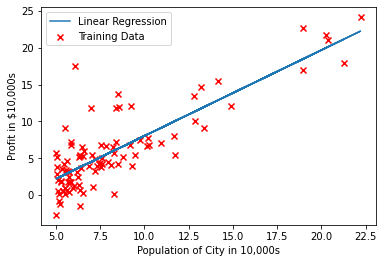

In [25]:
plt.scatter(X, y, color='red', marker='x', label='Training Data')
plt.plot(X, X_b.dot(theta), label='Linear Regression')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.legend()
plt.show()

# Step 6: Predictions (Single Variable)

In [26]:
predict1 = np.array([1, 3.5]).dot(theta)
predict2 = np.array([1, 7]).dot(theta)

print(f"Predicted profit for population 35,000: ${predict1*10000:.2f}")
print(f"Predicted profit for population 70,000: ${predict2*10000:.2f}")

Predicted profit for population 35,000: $4519.77
Predicted profit for population 70,000: $45342.45


# Step 7: Helper Functions

## Step 7.1: Feature Normalization (Multiple Variables)

In [27]:
def feature_normalize(X):
    """
    Normalizes each feature to have mean 0 and std 1
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

## Step 7.2: Gradient Descent (Multiple Variables)

In [28]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    """
    Gradient descent for multiple variables
    """
    m = y.size
    J_history = []

    for _ in range(num_iters):
        theta = theta - (alpha / m) * (X.T.dot(X.dot(theta) - y))
        J_history.append(compute_cost(X, y, theta))
    
    return theta, J_history

## Step 7.3: Normal Equation Solution

In [29]:
def normal_eqn(X, y):
    """
    Computes theta using the normal equation
    """
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# Step 8: Load Multi-Variable Data and Normalize Features

In [31]:
data = np.loadtxt(EX1DATA2, delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
m = y.size

print("First 10 examples from the dataset:")
for i in range(10):
    print(f"x = {X[i]}, y = {y[i]}")

# Normalize features
X_norm, mu, sigma = feature_normalize(X)

# Add intercept term
X_b = np.c_[np.ones(m), X_norm]

First 10 examples from the dataset:
x = [2104.    3.], y = 399900.0
x = [1600.    3.], y = 329900.0
x = [2400.    3.], y = 369000.0
x = [1416.    2.], y = 232000.0
x = [3000.    4.], y = 539900.0
x = [1985.    4.], y = 299900.0
x = [1534.    3.], y = 314900.0
x = [1427.    3.], y = 198999.0
x = [1380.    3.], y = 212000.0
x = [1494.    3.], y = 242500.0


# Step 9: Gradient Descent for Multi-Variable Data

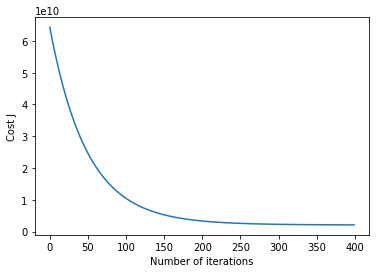

Theta computed from gradient descent: [334302.06399328 100087.11600585   3673.54845093]


In [32]:
alpha = 0.01
num_iters = 400
theta = np.zeros(3)

theta, J_history = gradient_descent_multi(X_b, y, theta, alpha, num_iters)

# Plot convergence
plt.plot(J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.show()

print("Theta computed from gradient descent:", theta)

# Step 10: Predict Price

In [36]:
# Example: predict price of 1650 sq-ft, 3 br house
x_example = np.array([1650, 3])

## Step 10.1: Predict Price Using Gradient Descent

In [37]:
x_example_norm = (x_example - mu) / sigma
x_example_b = np.r_[1, x_example_norm]

price = x_example_b.dot(theta)
print(f"Predicted price using gradient descent: ${price:.2f}")

Predicted price using gradient descent: $289314.62


## Step 10.2: Predict Price Using Normal Equation

In [38]:
X_b_full = np.c_[np.ones(m), data[:, 0:2]]
theta_ne = normal_eqn(X_b_full, y)

x_example_b_full = np.r_[1, x_example]
price_ne = x_example_b_full.dot(theta_ne)
print(f"Predicted price using normal equation: ${price_ne:.2f}")

Predicted price using normal equation: $293081.46
